{ФКИИ} Лабораторная работа №2 (Оптимизация в Pygmo)

Выполнил студент уч. группы М8О-109СВ-24 Дрёмов А.С.

В Pygmo
 - запрогроммировать две своих тестовых функции;
 - найти их оптимум 3 разными алгоритмами доступными в библиотеке;
 - получить таблицу сравнения

In [50]:
%pip install pygmo

In [51]:
import pygmo as pg
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

Будем хранить функцию оптимизации и данные о ней в виде класса

In [52]:
class OptimizationFunction:
    def __init__(self, function, domain, glob_min, name):
        self.function = function
        self.domain = domain
        self.glob_min = glob_min
        self.name = name

    def fitness(self, p):
        return [self.function(p[0], p[1])]

    def get_bounds(self):
        return self.domain.T

    def get_glob_min(self):
        return self.glob_min

    def get_name(self):
        return self.name

Функция Бута

In [53]:
booth_function = OptimizationFunction(
    function = lambda x, y: (x + 2 * y - 7)**2 + (2 * x + y - 5)**2,
    domain=np.array([[-10, 10], [-10, 10]]),
    glob_min=np.array([1, 3, 0]),
    name='booth',
)

Функция Шаффера

In [54]:
schaffer_n2_function = OptimizationFunction(
    function = lambda x, y: 0.5 + (np.sin(x**2 - y**2)**2 - 0.5) / (1 + 0.001 * (x**2 + y**2))**2,
    domain=np.array([[-100, 100], [-100, 100]]),
    glob_min=np.array([0, 0, 0]),
    name='schaffer_n2',
)

Визуализация

In [55]:
def visualize_optimization(function, algorithm, title, population_size=100, generations_cnt=100):
    pop = pg.population(function, population_size)

    fitness_list = []
    for i in range(generations_cnt):
        pop = algorithm.evolve(pop)
        fitness_list.append(pop.get_f()[pop.best_idx()])

    gens = np.linspace(0, generations_cnt, generations_cnt)
    fitness_list = np.array(fitness_list)

    fig = plt.figure(figsize = (10, 5))
    ax = plt.axes()

    ax.plot(gens, fitness_list, '-', marker='.', label="Best result")
    ax.plot(gens, np.full(len(gens), function.get_glob_min()[2]), '--', lw=2, label="Global min")

    ax.set_title(title)
    ax.set_xlabel("Generation")
    ax.set_ylabel("Fitness")
    ax.legend()

    return pop.get_x()[pop.best_idx()], pop.get_f()[pop.best_idx()]

Будем использовать следующие алгоритмы:
* SGA (Simple Genetic Algorithm) - эволюционный алгоритм, использующий операторы отбора, скрещивания и мутации;
* PSO (Particle Swarm Optimization) - алгоритм оптимизации роя частиц, который основывается на коллективном поведении;
* SA (Simulated Annealing) - алгоритм имитации отжига, который вдохновлён процессом закалки металлов.

Создадим таблицу для последующего анализа работы алгоритмов

In [56]:
table = {
    'SGA' : [],
    'PSO' : [],
    'SA' : []
}

Зададим параметры алгоритмов

In [57]:
# SGA, PSO
gen = 15

# SA
Ts, Tf = 10, 0.1

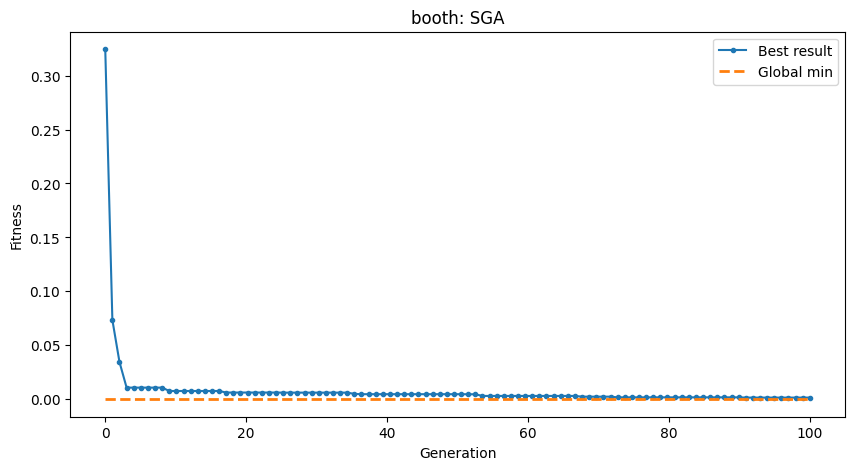

In [58]:
point, value = visualize_optimization(booth_function, pg.algorithm(pg.sga(gen=gen)), f'{booth_function.get_name()}: SGA')
table['SGA'].append((point, value))

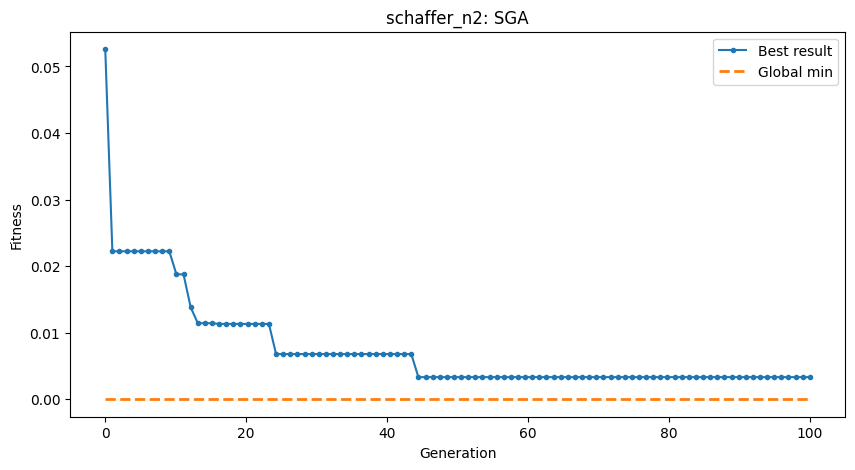

In [59]:
point, value = visualize_optimization(schaffer_n2_function, pg.algorithm(pg.sga(gen=gen)), f'{schaffer_n2_function.get_name()}: SGA')
table['SGA'].append((point, value))

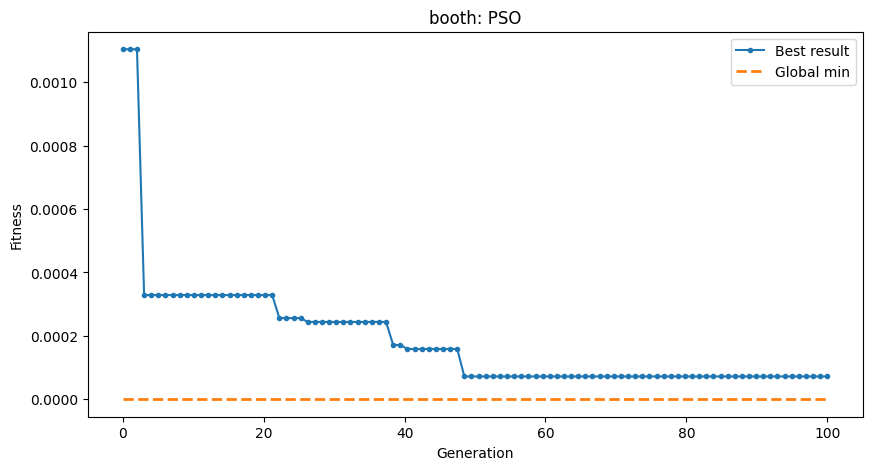

In [60]:
point, value = visualize_optimization(booth_function, pg.algorithm(pg.pso(gen=gen)), f'{booth_function.get_name()}: PSO')
table['PSO'].append((point, value))

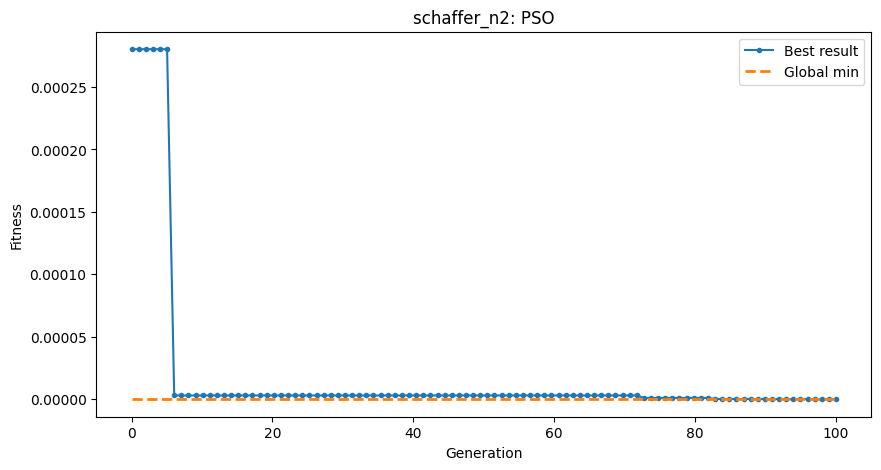

In [61]:
point, value = visualize_optimization(schaffer_n2_function, pg.algorithm(pg.pso(gen=gen)), f'{schaffer_n2_function.get_name()}: PSO')
table['PSO'].append((point, value))

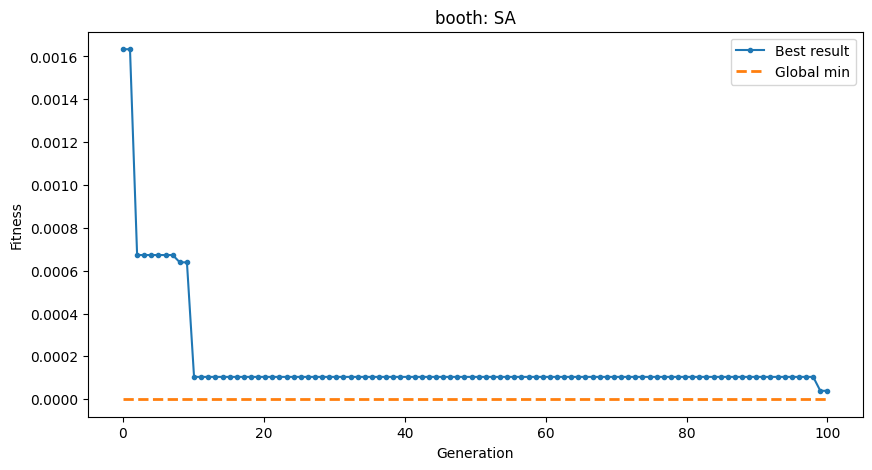

In [62]:
point, value = visualize_optimization(booth_function, pg.algorithm(pg.simulated_annealing(Ts=Ts, Tf=Tf)), f'{booth_function.get_name()}: SA')
table['SA'].append((point, value))

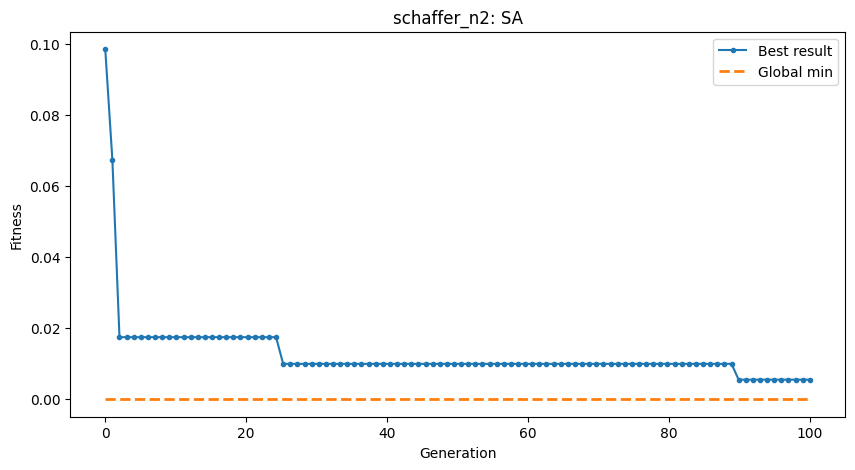

In [63]:
point, value = visualize_optimization(schaffer_n2_function, pg.algorithm(pg.simulated_annealing(Ts=Ts, Tf=Tf)), f'{schaffer_n2_function.get_name()}: SA')
table['SA'].append((point, value))

In [64]:
table

{'SGA': [(array([1.02520552, 2.97133518]), array([0.00150486])),
  (array([ 1.28913484, -1.28761819]), array([0.00331854]))],
 'PSO': [(array([1.00250686, 3.00147417]), array([7.18518609e-05])),
  (array([-0.01228852,  0.        ]), array([1.73811071e-07]))],
 'SA': [(array([0.9965469 , 3.00087281]), array([3.93173276e-05])),
  (array([ 1.99028384, -0.88972544]), array([0.005497]))]}

In [65]:
true_minima = {
    "booth": {"point": np.array([1, 3]), "value": 0},
    "schaffer_n2": {"point": np.array([0, 0]), "value": 0}
}

formatted_data = {
    f"func {i+1}": {algo: runs[i][1][0] for algo, runs in table.items()}
    for i in range(len(next(iter(table.values()))))
}

function_names = {"func 1": "booth", "func 2": "schaffer_n2"}

if isinstance(formatted_data, dict):
    df = pd.DataFrame([
        {
            'Function': function_names[f"func {i+1}"],
            'Algorithm': algo,
            'Objective Point': table[algo][i][0].tolist(),
            'Objective Value': table[algo][i][1][0],
            'True point': true_minima[function_names[f"func {i+1}"]]["point"].tolist(),
            'True value': true_minima[function_names[f"func {i+1}"]]["value"]
        }
        for i in range(len(next(iter(table.values()))))
        for algo in table.keys()
    ])

df

,Function,Algorithm,Objective Point,Objective Value,True point,True value
0,booth,SGA,"[1.0252055188686582, 2.9713351832347947]",1.504857e-03,"[1, 3]",0
1,booth,PSO,"[1.0025068604110379, 3.001474167761259]",7.185186e-05,"[1, 3]",0
2,booth,SA,"[0.9965468967736876, 3.0008728123351176]",3.931733e-05,"[1, 3]",0
3,schaffer_n2,SGA,"[1.2891348447886157, -1.2876181938139613]",3.318542e-03,"[0, 0]",0
4,schaffer_n2,PSO,"[-0.0122885217406965, 0.0]",1.738111e-07,"[0, 0]",0
5,schaffer_n2,SA,"[1.9902838359413977, -0.8897254359700923]",5.496996e-03,"[0, 0]",0


Выводы:
- PSO демонстрирует наилучшую точность для обеих функций. Оно хорошо справляется с задачами, даже с множеством локальных минимумов (как в функции Schaffer N.2).
- SGA справляется хуже, особенно на функции Schaffer N.2, где требуется больше усилий для выхода из локальных минимумов.
- SA находит решения близкие к оптимальным для Booth Function, но менее точен для Schaffer N.2.